# Задача 12. 

Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов, c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics
%matplotlib inline

Установим реккомендуемые параметры:

In [44]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

Загрузим данные:

In [45]:
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  
           'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
           'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = columns)
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Разобьем данные на класс и признаки, а также на обучающую и тестовую выборки:

In [69]:
X = data.loc[:, data.columns != 'Class'].values
Y = data.loc[:, data.columns == 'Class'].values

used_metrics = ['euclidean', 'manhattan', 'chebyshev']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size = 0.2, random_state = 42)

y_train = y_train.ravel()
y_test = y_test.ravel()

Посчитаем точность предсказания класса при разных метриках и разных параметрах kNN.

In [67]:
accuracy = np.zeros((3, 101))
for i in range(3):
    for num_neighbors in range(1, 101):
        nb = neighbors.KNeighborsClassifier(n_neighbors = num_neighbors, 
                                            metric = used_metrics[i])
        nb.fit(X_train, y_train)
        prediction = nb.predict(X_test)
        accuracy[i][num_neighbors] = metrics.accuracy_score(y_test, prediction)

Построим график зависимости точности от количеста соседей:

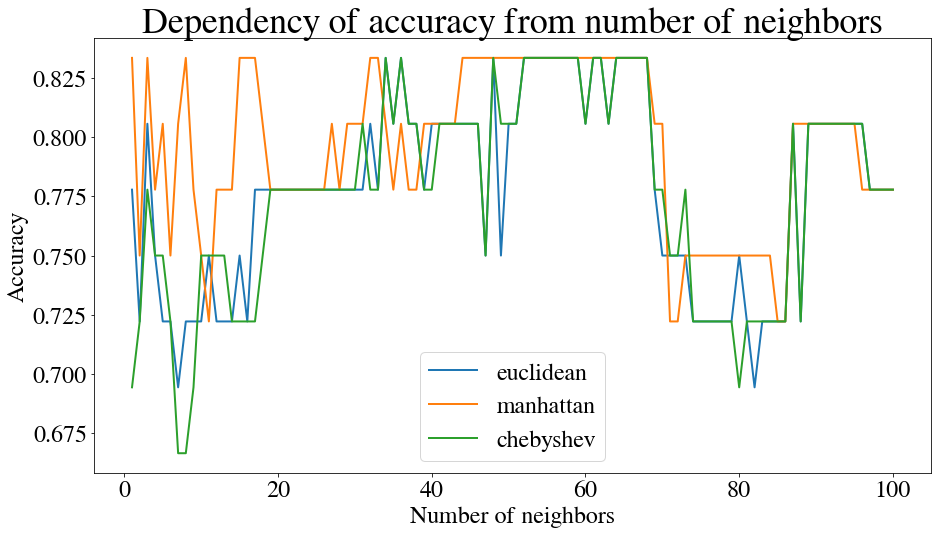

In [68]:
plt.figure(figsize=(15, 8))
for i in range(0, 3):
    plt.plot(np.linspace(1, 100, 100), accuracy[i][1:], label = used_metrics[i])
plt.legend()
plt.title('Dependency of accuracy from number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Вывод:

Как видно из графика, точность определения класса вина достаточно хорошая и не особо зависит от числа соседей в алгоритме kNN.